In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import warnings
import json
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
sys.path.append('/Users/alenastern/Documents/Spring2018/Machine_Learning/Machine_Learning_Public_Policy/hws/hw2')
import explore as ex
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

In [2]:
# import file with city metadata

json_file = 'cities.json'

with open(json_file, 'r') as f:
    md = json.load(f)

In [3]:
# import file with WWC city stats
cities = pd.read_csv('../../../WWC_basics.csv')

In [4]:
# create city variable + keep relevant vars
cs = cities['City, State'].str.split(",", expand = True)
cities['city'] = cs[0] + ' city'
cities = cities[['city', 'State', 'Pol_Lean_State', 'Region', 'Governance', 'Budget_1617']]
counties = pd.read_csv('counties.csv')
cities = pd.concat([cities, counties])

## Robust Policy Data Clean

An open data policy is considered robust if it received a score of 16 out of a possible 31 in a [previous study](https://www.opendatapolicies.org/feeds/) that evaluated policies for compliance with the Sunlight Foundation’s [31 open data policy guidelines](https://opendatapolicyhub.sunlightfoundation.com/guidelines/). A policy received 1 point for full compliance with each guideline, 0.5 points for near-compliance, and -1 points for enacting the opposite of the guideline.

In [5]:
# import spreadsheet with robust policy data
robust = pd.read_csv('docs_guidelines.tsv', delimiter = "\t", encoding='utf-8')

In [6]:
# Replace cities with opposite and close fit

## Denton, TX
mask = robust['Place ID'] == 'denton-tx'
column_name = ['26', '12', '10']
for name in column_name:
    robust.loc[mask, column_name] = .5
robust.loc[mask, '16'] = -1

In [7]:
## Washington, DC
mask = robust['Doc ID'] == 'washington-dc-2014-07-21'
column_name = ['22', '9']
for name in column_name:
    robust.loc[mask, column_name] = .5
    
## San Francisco, CA
mask = robust['Doc ID'] == 'san-francisco-ca-2013-03-28'
column_name = ['28', '24', '23']
for name in column_name:
    robust.loc[mask, column_name] = .5
    
## Oakland, CA
mask = robust['Doc ID'] == 'oakland-ca-2013-10-15'
column_name = ['8', '13', '28']
for name in column_name:
    robust.loc[mask, column_name] = .5
    
## West Sacramento, CA
mask = robust['Doc ID'] == 'west-sacramento-ca-2013-10-16'
column_name = ['2', '22', '24', '27']
for name in column_name:
    robust.loc[mask, column_name] = .5
    
## Sacramento, CA
mask = robust['Doc ID'] == 'sacramento-ca-2013'
column_name = ['4', '13']
for name in column_name:
    robust.loc[mask, column_name] = .5
    
## Las Vegas, NV
mask = robust['Doc ID'] == 'las-vegas-nv-2014-01-30'
column_name = ['10', '11', '13', '5', '1']
for name in column_name:
    robust.loc[mask, column_name] = .5
    
## Salt Lake City, UT
mask = robust['Doc ID'] == 'salt-lake-city-ut-2014'
column_name = ['8', '10', '28']
for name in column_name:
    robust.loc[mask, column_name] = .5
    
## Waco, TX
mask = robust['Doc ID'] == 'waco-tx-2015-12-15'
column_name = ['11', '29']
for name in column_name:
    robust.loc[mask, column_name] = .5

Some cities issue multiple open data policies over time. For example, a policy might begin as an executive order and then be passed as an ordinance by the city council. We want to identify the policy version that has the maximum compliance score and use that score to identify whether a city has a robust policy.

In [8]:
max_all = pd.DataFrame(robust.groupby('Place ID').max())

In [9]:
max_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']] = max_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']].apply(pd.to_numeric)

In [10]:
max_all['total'] = max_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']].sum(axis=1)

In [11]:
max_all.reset_index(inplace=True)
max_all = max_all[['Place ID', 'total']]

In [12]:
max_all[max_all['total'] == 0.0]
# cape coral, fort worth, greensboro, palo alto, riverside in list

,Place ID,total
3,arlington-tx,0.0
6,baltimore-md,0.0
7,baton-rouge-la,0.0
8,bay-area-rapid-transit-ca,0.0
9,bellevue-wa,0.0
10,bethlehem-pa,0.0
16,buffalo-ny,0.0
18,cape-coral-fl,0.0
20,charlottesville-va,0.0
23,cincinnati-oh,0.0


## Process City Data

For each city in our sample, we process the raw data to prepare it for analysis.

In [13]:
# Fields for final data frame
data = pd.DataFrame(columns = ['month_year', 'count', 'city', 'state', 'odp_date', 'policy', 'portal_date', 'portal', 
                              'year', 'months', '2015', '2016', '2017', '2018', 'robust_portal', 'robust_policy',
                              'count_diff', 'req_ratio', 'policy_lag3', 'policy_lag6', 'portal_lag3', 'portal_lag6', 
                              'policy_months_lag3', 'policy_months_lag6', 'portal_months_lag3', 'portal_months_lag6',
                              'policy_3_6months', 'policy_6_12months', 'policy_1_2year', 'policy_2_3year', 
                              'policy_over3year', 'portal_3_6months', 'portal_6_12months', 'portal_1_2year', 
                              'portal_2_3year', 'portal_over3year', 'time_complete'])

# Initialize counter variable to count total number of PRRs in final dataset
num_PRR = 0


for key, value in md.items():
    city = value['name']
    filepath = '/Users/alenastern/Google Drive File Stream/My Drive/Alena_Project/PR_Data/{}.csv'.format(city)
    try:
        df = pd.read_csv(filepath)
    except:
        try:
            df = pd.read_csv(filepath, encoding='mac_roman')
        except:
            continue
    print(key)
    
    # Convert create date field to datetime
    try:
        df['Create Date'] = pd.to_datetime(df['Create Date'])
    except:
        df['New'] = pd.to_datetime(df['Create Date'].apply(lambda x: re.findall('^\S*', x)[0]))
        df.drop(columns=['Create Date'], inplace = True)
        df.rename(index=str, columns={"New": "Create Date"}, inplace = True)
    
    num_PRR += len(df['Create Date'])
    print(len(df['Create Date']))
    
    # count number of requests per month     
    df['month_year'] = df['Create Date'].dt.to_period('M')
    month_count = df.groupby('month_year').count()
    month_count.rename(index=str, columns={"Create Date": "count"}, inplace = True)
    month_count.index = month_count.index.to_series().astype(str)
    month_count = month_count.reset_index()
    month_count = month_count[['month_year', 'count']]
    
    # count unique requesters each month, if no requester data included, initialize variables as 'NaN'
    if value['req'] == 'Y':
        df['requester'] = df.requester.str.lower()
        month_req_count = df.groupby('month_year').requester.nunique()
        month_req_count.index = month_req_count.index.to_series().astype(str)
        month_req_count = month_req_count.reset_index()
        month_req_count.rename(index=str, columns={"requester": "count_req"}, inplace = True)
        month_req_count = month_req_count[['month_year', 'count_req']]
        mc = month_count.merge(month_req_count, how = 'left', on = 'month_year')
        mc['count_diff'] = mc['count'] - mc['count_req']
        mc['req_ratio'] = mc['count_req']/mc['count']
        
    else:
        month_count['count_req'] = 'NaN'
        month_count['count_diff'] = 'NaN'
        month_count['req_ratio'] = 'NaN'
        mc = month_count.copy()
        
    # for Next Request portals, calculate number of days to complete request, else initialize as 'NaN'
    if value['portal_type'] == 'NR':
        tc = df[df['Request Status'] == 'closed']
        tc['Close Date'] = tc['Close Date'].apply(str)
        tc['Close Date'] = tc['Close Date'].str.replace('by(.*)', '', case=False)
        tc['Close Date'] = tc['Close Date'].str.replace('\n(.*)', '', case=False)
        tc['Close Date'] = pd.to_datetime(tc['Close Date'])
        tc['Create Date'] = pd.to_datetime(tc['Create Date'])
        tc['delta'] = tc['Close Date'] - tc['Create Date']
        tc['time_complete'] = tc['delta'].apply(lambda x: x / np.timedelta64(1, 'D'))
        month_tc_count = tc.groupby('month_year').mean()
        month_tc_count.index = month_tc_count.index.to_series().astype(str)
        month_tc_count = month_tc_count.reset_index()
        month_tc_count = month_tc_count[['month_year', 'time_complete']]
        mc = mc.merge(month_tc_count, how = 'left', on = 'month_year')

    else:
        mc['time_complete'] = 'NaN'

    #remove June and July data because city data was accessed throughout the months of June and July
    mc = mc[((mc['month_year'] != '07-2018') & (mc['month_year'] != '2018-07') 
            & (mc['month_year'] != '06-2018') & (mc['month_year'] != '2018-06'))] 
    mc['city'] = key
    mc['state'] = value['state']
    
    # calculate open data policy variables for cities with policy, otherwise initialize as 'NaN'
    if value['odp'] == "Y":
        odp_dl = value['odp_launch'].split('-')
        mc['odp_date'] = dt.datetime(int(odp_dl[2]),int(odp_dl[0]),int(odp_dl[1]))
        mc['policy'] = np.where(pd.to_datetime(mc['month_year'])< mc['odp_date'], 0, 1)
        mc['policy_months'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month)
        mc['policy_lag3'] = np.where(((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month) < 3, 0, 1)
        mc['policy_lag6'] = np.where(((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month) < 6, 0, 1)
        mc['policy_months_lag3'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month) - 3
        mc['policy_months_lag6'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month) - 6
        mc['policy_3_6mos'] = np.where((mc['policy_months'] > 3) & (mc['policy_months'] <= 6) , 1, 0)
        mc['policy_6_12mos'] = np.where((mc['policy_months'] > 6) & (mc['policy_months'] <= 12) , 1, 0)
        mc['policy_1_2year'] = np.where((mc['policy_months'] > 12) & (mc['policy_months'] <= 24) , 1, 0)
        mc['policy_2_3year'] = np.where((mc['policy_months'] > 24) & (mc['policy_months'] <= 36) , 1, 0)
        mc['policy_over3year'] = np.where(mc['policy_months'] > 36 , 1, 0)
        mc['treatment_pol'] = 1
    
    else:
        mc['odp_date'] = 'NaN'
        mc['policy'] = 0
        mc['policy_months'] = 0
        mc['policy_lag3'] = 0
        mc['policy_months_lag3'] = 0
        mc['policy_lag6'] = 0
        mc['policy_months_lag6'] = 0
        mc['treatment_pol'] = 0
        
    # calculate open data portal variables for cities with portal, otherwise initialize as 'NaN'
    if value['portal'] == "Y":
        portal_dl = value['portal_launch'].split('-')
        mc['portal_date'] = dt.datetime(int(portal_dl[2]),int(portal_dl[0]),int(portal_dl[1]))
        mc['portal'] = np.where(pd.to_datetime(mc['month_year'])< mc['portal_date'], 0, 1)
        mc['portal_months'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month)
        mc['portal_lag3'] = np.where(((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month) < 3, 0, 1)
        mc['portal_lag6'] = np.where(((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month) < 6, 0, 1)
        mc['portal_months_lag3'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month) - 3
        mc['portal_months_lag6'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month) - 6
        mc['portal_3_6mos'] = np.where((mc['portal_months'] > 3) & (mc['portal_months'] <= 6) , 1, 0)
        mc['portal_6_12mos'] = np.where((mc['portal_months'] > 6) & (mc['portal_months'] <= 12) , 1, 0)
        mc['portal_1_2year'] = np.where((mc['portal_months'] > 12) & (mc['portal_months'] <= 24) , 1, 0)
        mc['portal_2_3year'] = np.where((mc['portal_months'] > 24) & (mc['portal_months'] <= 36) , 1, 0)
        mc['portal_over3year'] = np.where(mc['portal_months'] > 36 , 1, 0)
        mc['treatment_por'] = 1
        if value['robust_portal'] == "Y":
            mc['robust_portal'] = mc['portal']
            mc['robust_portal_lag3'] = mc['portal_lag3']
            mc['robust_portal_lag6'] = mc['portal_lag6']
        else: 
            mc['robust_portal'] = 0
    else:
        mc['portal_date'] = 'NaN'
        mc['portal'] = 0
        mc['portal_months'] = 0
        mc['portal'] = 0
        mc['portal_months'] = 0
        mc['portal_lag3'] = 0
        mc['portal_months_lag3'] = 0
        mc['portal_lag6'] = 0
        mc['portal_months_lag6'] = 0
        mc['robust_portal'] = 0
        mc['robust_portal_lag3'] = 0
        mc['robust_portal_lag6'] = 0
        mc['treatment_por'] = 0
        
    #create year variable
    mc['year'] = pd.to_datetime(mc['month_year']).dt.year
    
    #remove first month of data
    first_month = min(df['month_year'])
    mc = mc[mc['month_year'] != str(first_month)]
    mc['months'] = ((pd.to_datetime(mc['month_year']).dt.year - first_month.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - first_month.month)


    #create year dummy variables
    mc['2015'] = np.where(mc['year']== 2015, 1, 0)
    mc['2016'] = np.where(mc['year']== 2016, 1, 0)
    mc['2017'] = np.where(mc['year']== 2017, 1, 0)
    mc['2018'] = np.where(mc['year']== 2018, 1, 0)
    
    data = pd.concat([data, mc])
        
    

Albuquerque city
12236
Alexandria city
10938
Arlington city
942
Asheville city
75
Bainbridge Island city
712
Belleville city
1455
Bellevue city
459
Boulder County
99
Cape Coral city
2500
Cathedral City city
337
Clark County
9175
Clearwater city
23722
Corona city
21151
Dayton city
637
Denton city
2580
El Dorado County
88
Everett city
10258
Fort Collins city
116
Fort Worth city
36097
Galveston city
3514
Greensboro city
4186
Hayward city
442
Joliet city
1033
Kirkland city
9011
Laredo city
6825
Las Cruces city
679
Las Vegas city
7852
Lynnwood city
260
Mercer Island city
421
Miami city
3092
Middleborough town
12
New Orleans city
3428
Oakland city
11814
Oklahoma City city
9076
Olympia city
7700
Palo Alto city
1045
Peoria city
862
Providence city
2252
Pullman city
3150
Rancho Cucamonga city
32
Redmond city
6528
Renton city
596
Riverside city
1589
Sacramento city
1028
Salt Lake City city
1203
San Francisco city
1681
San Mateo city
37
Tukwila city
4190
Vallejo city
350
Washington city
8074
West

In [13]:
len(data.city.unique())

52

In [14]:
num_PRR

236616

In [14]:
# import city data from ACS (2016)
cd = pd.read_csv('city_data.csv')

In [15]:
# import city data from ACS(2009)
cd09 = pd.read_csv('city_data_2009.csv')

In [30]:
# number of months of data per city 
data.groupby('city').count()

,2015,2016,2017,2018,count,month_year,months,odp_date,policy,policy_lag3,policy_lag6,policy_months,policy_months_lag3,policy_months_lag6,portal,portal_date,portal_lag3,portal_lag6,portal_months,portal_months_lag3,portal_months_lag6,robust_portal,robust_portal_lag3,robust_portal_lag6,state,year
city,,,,,,,,,,,,,,,,,,,,,,,,,,
Albuquerque city,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Alexandria city,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,0,0,94,94
Arlington city,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Asheville city,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Bainbridge Island city,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Belleville city,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
Bellevue city,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,6,6
Boulder County,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,8,8
Cape Coral city,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2


In [16]:
# Merge ACS data with main data frame
data['city_state'] = data['city'] + data['state']
cd['city_state'] = cd['city'] + cd['state_code']
cd09['city_state'] = cd09['city'] + cd09['state_code']
cd.drop(columns=['year'], inplace = True)
cd09.drop(columns=['year'], inplace = True)
cd_mg = data.merge(cd, how ='left', on = 'city_state')
cd_mg = cd_mg.merge(cd09, how = 'left', on = 'city_state')
cd_mg.rename(index=str, columns={'city_x': 'city'}, inplace = True)

In [17]:
# Merge city government and robust policy data with main data frame
cities['city_state'] = cities['city'] + cities['State']
cities['Place ID'] = cities['city'].str.lower().str.replace(' city', '').str.replace(' ','-') + '-' + cities['State'].str.lower()
mc_mg = cd_mg.merge(cities, how ='left', on = 'city_state')
mc_mg = mc_mg.merge(max_all, how = 'left', on = 'Place ID')

In [21]:
# Create robust policy variables
mc_mg['robust_policy'] = np.where((mc_mg['total'] > 16) & (mc_mg['policy'] == 1), 1, 0)
mc_mg['robust_policy_lag3'] = np.where((mc_mg['total'] > 16) & (mc_mg['policy_lag3'] == 1), 1, 0)
mc_mg['robust_policy_lag6'] = np.where((mc_mg['total'] > 16) & (mc_mg['policy_lag6'] == 1), 1, 0)

In [22]:
# create year dummies
mc_mg['2015'] = np.where(mc_mg['year']== 2015, 1, 0)
mc_mg['2016'] = np.where(mc_mg['year']== 2016, 1, 0)
mc_mg['2017'] = np.where(mc_mg['year']== 2017, 1, 0)
mc_mg['2018'] = np.where(mc_mg['year']== 2018, 1, 0)

In [23]:
# create governance dummies
mc_mg['mayor_council'] = np.where(mc_mg['Governance']== 'Mayor-Council', 1, 0)
mc_mg['council_manager'] = np.where(mc_mg['Governance']== 'Council-Manager', 1, 0)

In [24]:
# create state political lean dummies
mc_mg['rep'] = np.where((mc_mg['Pol_Lean_State']== 'Lean Republican') | (mc_mg['Pol_Lean_State']== 'Solid Republican'), 1, 0)
mc_mg['dem'] = np.where((mc_mg['Pol_Lean_State']== 'Lean Democratic') | (mc_mg['Pol_Lean_State']== 'Solid Democratic'), 1, 0)


In [25]:
# create dosage variable
mc_mg['treat_score'] = mc_mg['policy'] + mc_mg['portal'] + mc_mg['robust_portal'] + mc_mg['robust_policy']

In [26]:
# keep relevant variables
clean_data = mc_mg[['month_year', 'count', 'count_req', 'city_x', 'state_x', 'months', 'policy_months', 'portal_months','policy', 
                    'portal','population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep', 'population_09', 
                    'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09',
                    'pct_bachelor_09', 'robust_portal','treat_score', 'year', 'robust_policy', 'count_diff', 'req_ratio',
                   'policy_lag3', 'policy_lag6', 'portal_lag3', 'portal_lag6', 'policy_months_lag3', 'policy_months_lag6',
                   'portal_months_lag3', 'portal_months_lag6', 'policy_3_6mos', 'policy_6_12mos', 'policy_1_2year', 'policy_2_3year', 
                    'policy_over3year', 'portal_3_6mos', 'portal_6_12mos', 'portal_1_2year', 'portal_2_3year', 
                    'portal_over3year', 'time_complete', 'treatment_pol', 'treatment_por']]

# convert numeric variables to numeric type
clean_data[['count', 'months', 'policy_months', 'portal_months','policy', 
                    'portal','population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep',
                  'robust_portal','treat_score', 'population_09', 
                    'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09',
                    'pct_bachelor_09', 'year', 'robust_policy',
                   'policy_lag3', 'policy_lag6', 'portal_lag3', 'portal_lag6', 'policy_months_lag3', 'policy_months_lag6',
                   'portal_months_lag3', 'portal_months_lag6', 'policy_3_6mos', 'policy_6_12mos', 'policy_1_2year', 'policy_2_3year', 
                    'policy_over3year', 'portal_3_6mos', 'portal_6_12mos', 'portal_1_2year', 'portal_2_3year', 
                    'portal_over3year', 'treatment_pol', 'treatment_por']] = clean_data[['count', 'months', 'policy_months', 'portal_months','policy', 
                    'portal','population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep',
                   'robust_portal','treat_score', 'population_09', 
                    'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09',
                    'pct_bachelor_09', 'year', 'robust_policy', 
                   'policy_lag3', 'policy_lag6', 'portal_lag3', 'portal_lag6', 'policy_months_lag3', 'policy_months_lag6',
                   'portal_months_lag3', 'portal_months_lag6', 'policy_3_6mos', 'policy_6_12mos', 'policy_1_2year', 'policy_2_3year', 
                    'policy_over3year', 'portal_3_6mos', 'portal_6_12mos', 'portal_1_2year', 'portal_2_3year', 
                    'portal_over3year', 'treatment_pol', 'treatment_por']].apply(pd.to_numeric)
clean_data['month_year'] = pd.to_datetime(clean_data['month_year'], format = '%Y-%m-%d')

In [27]:
# Save as csv
clean_data.to_csv('clean_data.csv', index = False)

## Sample Subsets

We create several subsets of our sample removing outliers to run as robustnes checks in our model

In [3]:
clean_data = pd.read_csv('clean_data.csv')

In [73]:
clean_data = clean_data.loc[:, ~clean_data.columns.duplicated()]
clean_data.columns

Index(['month_year', 'count', 'count_req', 'city_x', 'state_x', 'months', 'policy_months', 'portal_months', 'policy', 'portal', 'population', 'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male', 'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015', '2016', '2017', '2018', 'mayor_council', 'council_manager', 'dem', 'rep', 'population_09', 'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09', 'pct_bachelor_09', 'robust_portal', 'treat_score', 'year_x', 'robust_policy', 'count_diff', 'req_ratio'], dtype='object')

In [85]:
gp = clean_data.groupby('city_x').count()
gp.reset_index(inplace=True)
gp = pd.DataFrame(gp)

# Remove cities with fewer than 10 months of data
cities_10 = gp[gp['2015'] < 10]
cities = list(cities_10['city_x'])
clean_data_10 = clean_data[~clean_data['city_x'].isin(cities)]
clean_data_nocc = clean_data[clean_data['city_x'] != 'Cape Coral city']
clean_data_10.to_csv('clean_data_10.csv', index = False)
clean_data_nocc.to_csv('clean_data_nocc.csv', index = False)

# Remove cities with more than 90 months of data
cities_90 = gp[gp['2015'] > 90]
cities_90 = list(cities_90['city_x'])
clean_data_90 = clean_data[~clean_data['city_x'].isin(cities_90)]
clean_data_90.to_csv('clean_data_90.csv', index = False)

In [84]:
# Remove both cities with less than 10 and more than 90 months of data
cities9010 = cities_90 + cities
clean_data_9010 = clean_data[~clean_data['city_x'].isin(cities9010)]
clean_data_9010.to_csv('clean_data_9010.csv', index = False)

In [86]:
# Remove all observations before 2011
clean_data_2011 = clean_data[pd.to_numeric(clean_data['year_x']) >= 2011]
clean_data_2011.to_csv('clean_data_2011.csv', index= False)

# Data Exploration

In [54]:
#Summary statistics for variables
ex.dist_table(clean_data)

,count,months,policy_months,portal_months,policy,portal,population,median_age,median_gross_rent,median_income,pct_25_34,pct_male,pct_black,pct_white,pct_bachelor,Budget_1617,2015,2016,2017,2018,mayor_council,council_manager,dem,rep,population_09,median_age_09,median_income_09,pct_25_34_09,pct_male_09,pct_black_09,pct_white_09,pct_bachelor_09,robust_portal,treat_score,year,robust_policy
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1.307000e+03,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.0,1312.000000
mean,129.886433,26.356707,8.980945,8.972561,0.280488,0.416921,214673.975610,35.330183,1144.455793,31575.442835,0.165702,0.489456,0.136216,0.651947,0.149342,9.133150e+08,0.110518,0.223323,0.334604,0.176829,0.336128,0.622713,0.610518,0.133384,193416.874238,34.301601,29107.285061,0.160987,0.492681,0.137320,0.660088,0.139701,0.168445,0.908537,2009.0,0.042683
std,187.464881,23.605308,28.168672,31.201114,0.449409,0.493238,214017.718345,4.329263,346.003187,12255.354831,0.034922,0.012748,0.133884,0.155604,0.053369,2.100348e+09,0.313654,0.416632,0.472032,0.381670,0.472563,0.484892,0.487819,0.340119,188389.025675,4.050046,10504.832654,0.039352,0.014263,0.136421,0.166606,0.054212,0.374404,1.218039,0.0,0.202218
min,1.000000,1.000000,-71.000000,-97.000000,0.000000,0.000000,18749.000000,22.000000,636.000000,9733.000000,0.064769,0.454851,0.009281,0.340338,0.069277,2.808853e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16500.000000,21.900000,8022.000000,0.050449,0.463034,0.004411,0.318122,0.064404,0.000000,0.000000,2009.0,0.000000
25%,16.000000,9.000000,0.000000,0.000000,0.000000,0.000000,51386.000000,33.800000,907.000000,24895.000000,0.149166,0.482291,0.024560,0.519345,0.112733,1.814126e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48997.500000,32.400000,24014.000000,0.139426,0.482087,0.026920,0.557950,0.102061,0.000000,0.000000,2009.0,0.000000
50%,58.000000,19.000000,0.000000,0.000000,0.000000,0.000000,151473.000000,35.500000,1049.000000,27178.000000,0.160659,0.489515,0.113801,0.663352,0.129476,3.471842e+08,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,141065.000000,34.300000,26922.000000,0.160077,0.493212,0.127353,0.680006,0.115172,0.000000,0.000000,2009.0,0.000000
75%,143.000000,36.000000,7.250000,30.250000,1.000000,1.000000,282177.000000,37.100000,1417.000000,31653.000000,0.173983,0.496103,0.195255,0.756231,0.185525,9.790600e+08,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,245776.000000,36.100000,31733.000000,0.173662,0.501577,0.197535,0.805102,0.162009,0.000000,2.000000,2009.0,0.000000
max,964.000000,104.000000,148.000000,112.000000,1.000000,1.000000,850282.000000,48.500000,2283.000000,69576.000000,0.237468,0.529023,0.598406,0.946801,0.297176,1.340000e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,797271.000000,46.000000,61261.000000,0.251416,0.532063,0.630114,0.936231,0.275524,1.000000,4.000000,2009.0,1.000000


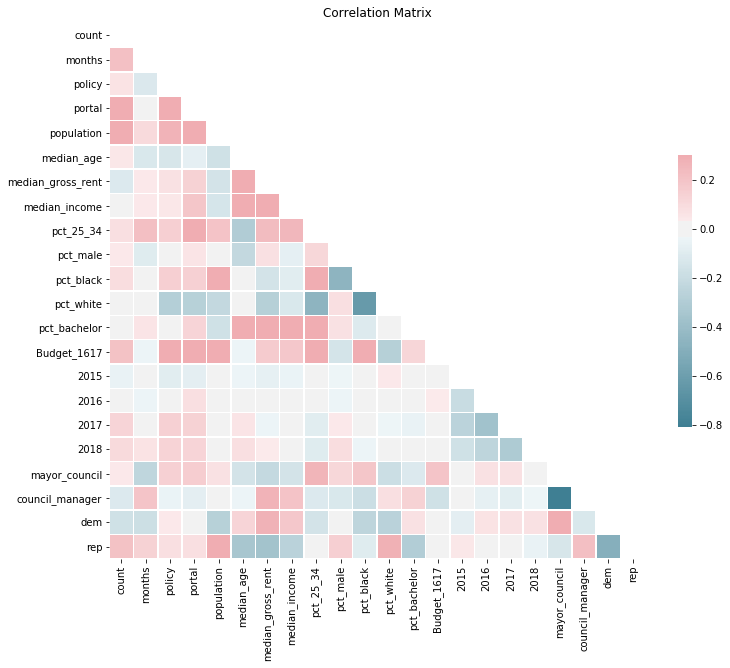

In [208]:
# Variable correlation matrix 
corr_vars = ['count', 'months', 'policy', 'portal',
                    'population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep']
corr_df = clean_data[corr_vars]
corr_table = corr_df.corr()

# Colored correlation matrix for display
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix")

plt.show()

count


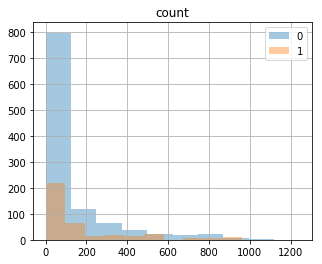

months


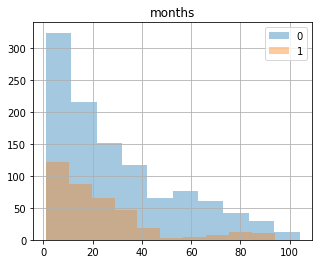

policy


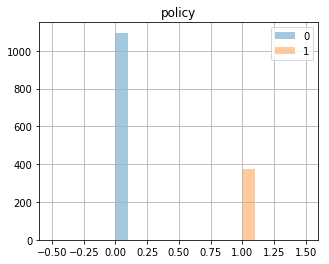

portal


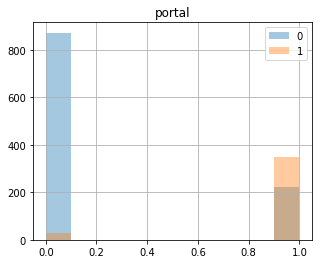

population


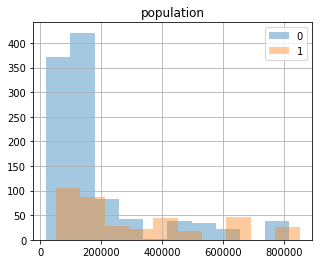

median_age


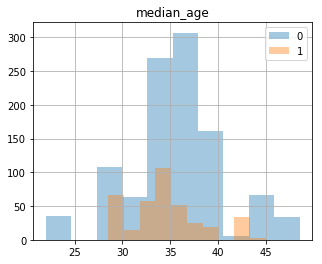

median_gross_rent


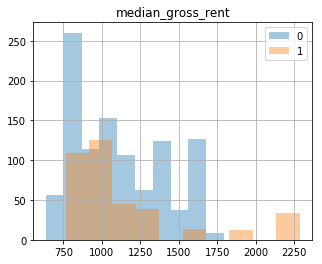

median_income


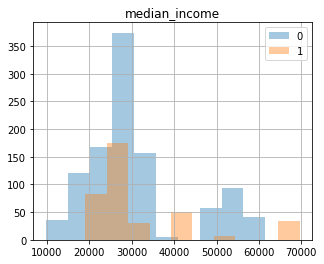

pct_25_34


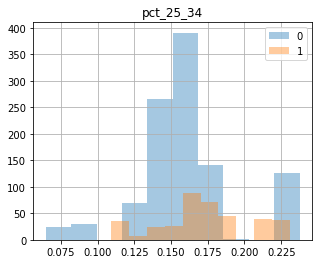

pct_male


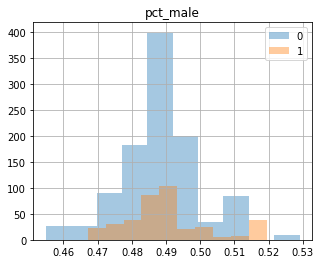

pct_black


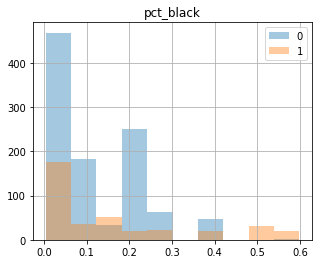

pct_white


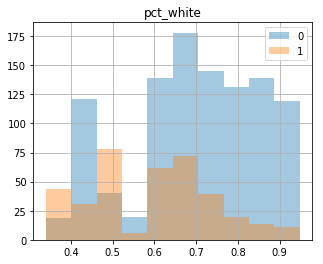

pct_bachelor


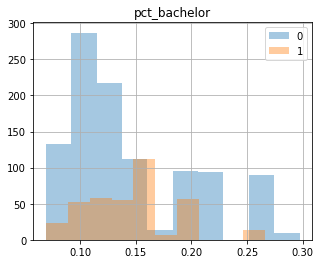

Budget_1617


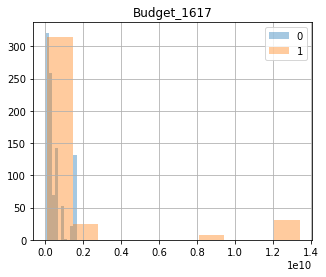

2015


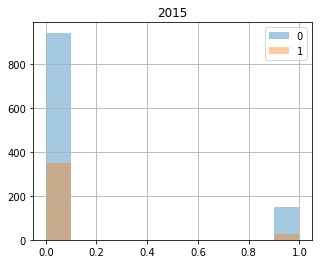

2016


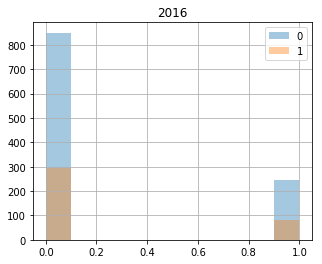

2017


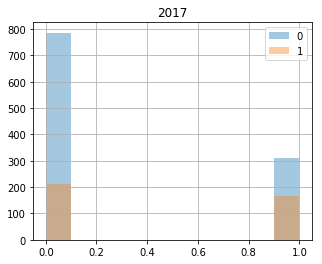

2018


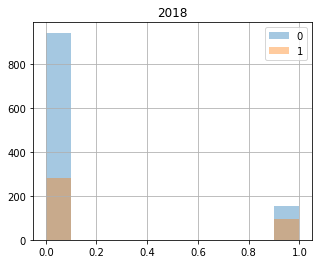

mayor_council


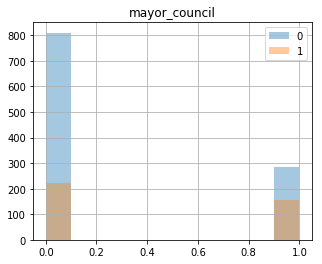

council_manager


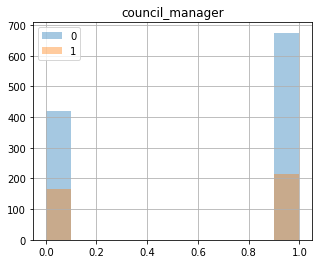

dem


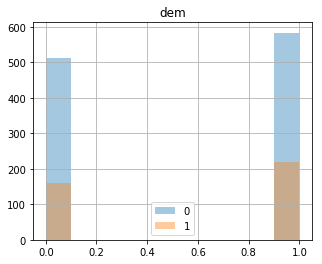

rep


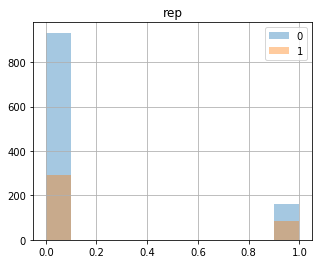

req_ratio


AttributeError: 'NoneType' object has no attribute 'update'

In [210]:
# Plot distribution of variables for treatment and controm groups
plt.rcParams['figure.figsize'] = 5, 4
grp = corr_df.groupby('policy')
var = corr_df.columns

for v in var:
    print(v)
    grp[v].hist(alpha=0.4)
    plt.title(v)
    plt.legend([0,1])
    plt.show()

In [87]:
# Calculate difference of means for treatment and control group

avg_count = clean_data.groupby('city_x').mean()
avg_count['treatment'] = np.where(avg_count['policy'] > 0, 1, 0)
dm = avg_count.groupby('treatment').mean()
dm